In this section, we import the necessary Python libraries, such as pandas, numpy, seaborn, and matplotlib, for data analysis and visualization.


In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('DATA/Mall_Customers.csv')  

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We load the dataset into a pandas DataFrame for further analysis. The dataset contains information about customers, including their gender, age, annual income, and spending score.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.drop(columns='CustomerID').describe()


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
df.describe(include='O')


,Gender
count,200
unique,2
top,Female
freq,112


C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


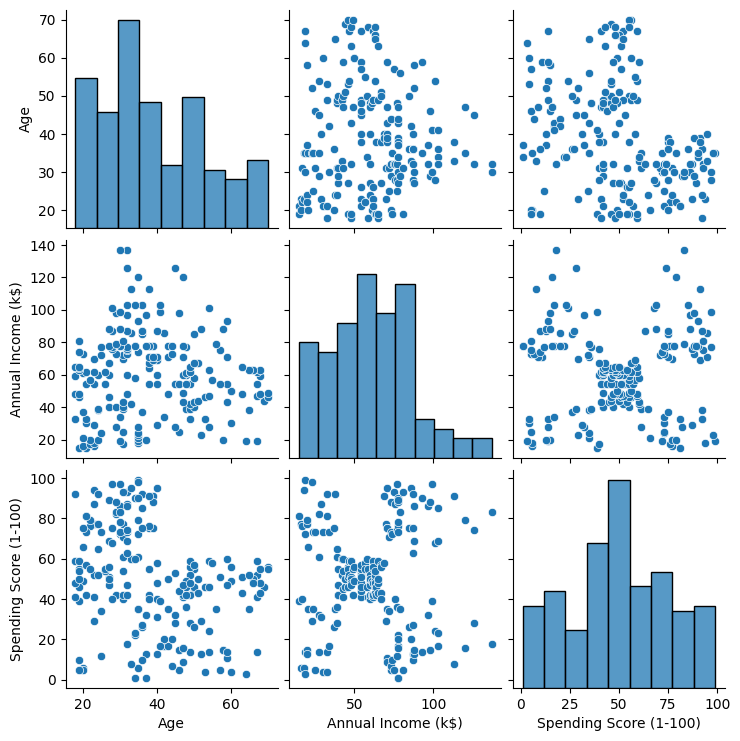

In [6]:
sns.pairplot(df.drop(columns='CustomerID'));

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

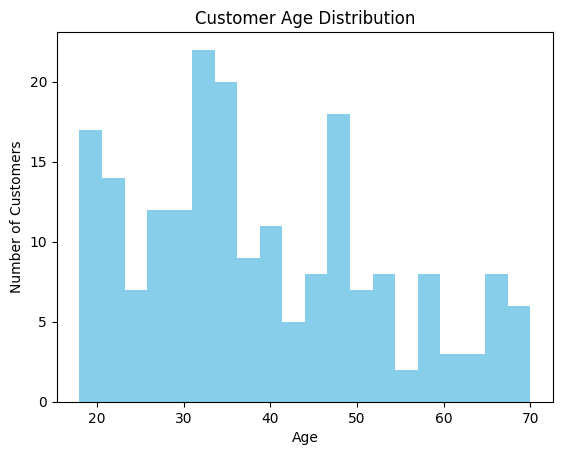

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Age Distribution')
plt.show()


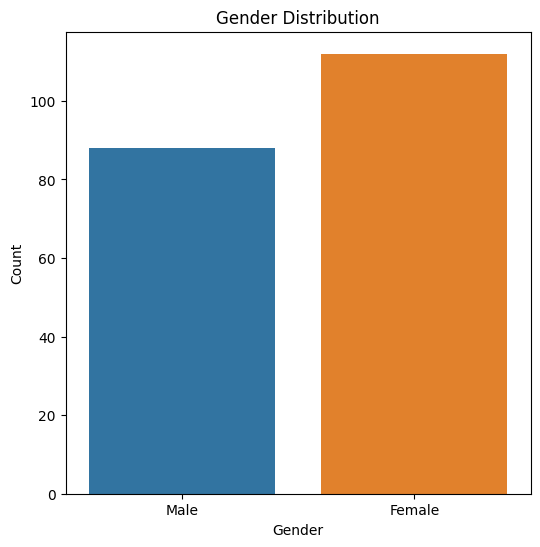

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

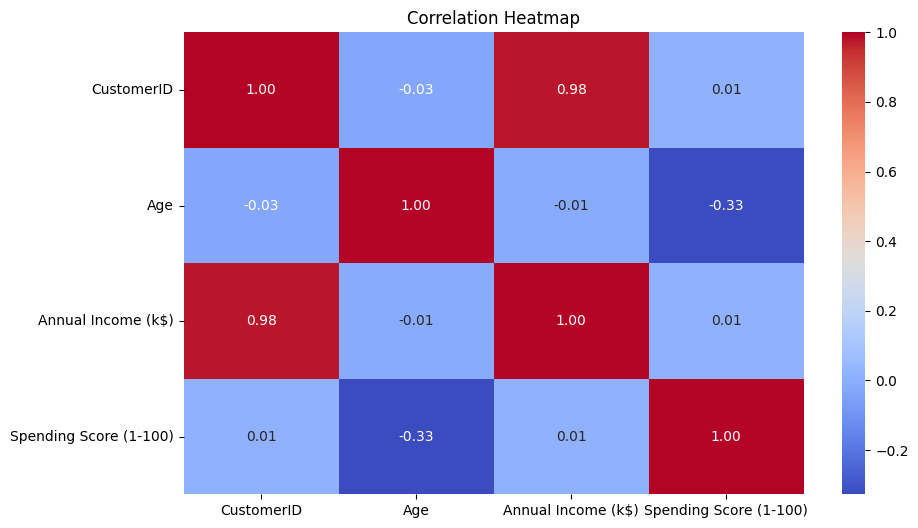

In [10]:
import numpy as np


numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


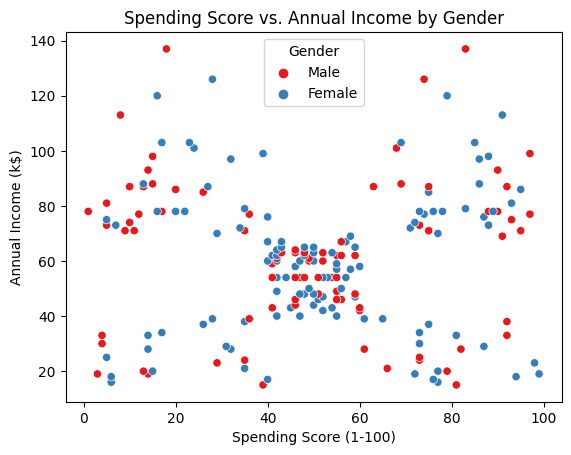

In [11]:

sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, hue='Gender', palette='Set1')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.title('Spending Score vs. Annual Income by Gender')
plt.show()

Using techniques such as K-means clustering, we segment customers into different groups based on their spending behavior and demographics.


In [12]:
from sklearn.cluster import KMeans


In [13]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

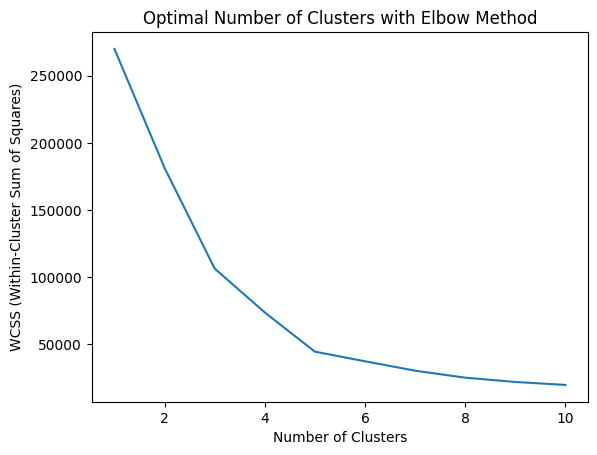

In [15]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Optimal Number of Clusters with Elbow Method')
plt.show()

In [16]:
optimal_kume_count = 5


In [17]:
kmeans = KMeans(n_clusters=optimal_kume_count, init='k-means++', max_iter=300, n_init=10, random_state=0)


In [18]:
df['Cluster'] = kmeans.fit_predict(X)


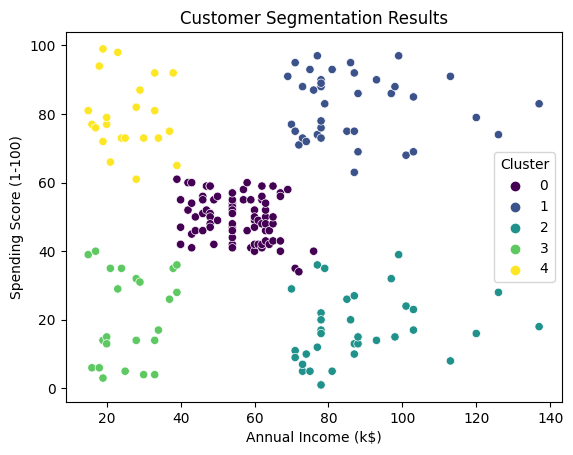

In [19]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation Results')
plt.show()

We calculate the Customer Lifetime Value (CLV) for each customer using historical data. This helps us understand the long-term value of customers.


In [20]:
from sklearn.cluster import k_means


df["Target"]=k_means

In [21]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Target
0,1,Male,19,15,39,3,<function k_means at 0x000002430305ADE0>
1,2,Male,21,15,81,4,<function k_means at 0x000002430305ADE0>
2,3,Female,20,16,6,3,<function k_means at 0x000002430305ADE0>
3,4,Female,23,16,77,4,<function k_means at 0x000002430305ADE0>
4,5,Female,31,17,40,3,<function k_means at 0x000002430305ADE0>


In [22]:
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Recency': [10, 5, 3, 8, 1],  
    'Frequency': [3, 8, 4, 2, 12],  
    'Monetary': [150, 300, 200, 50, 800],  
}

df = pd.DataFrame(data)

In [23]:
quantiles = df.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()



def r_score(x, col):
    if x <= quantiles[col][0.25]:
        return 1
    elif x <= quantiles[col][0.5]:
        return 2
    elif x <= quantiles[col][0.75]:
        return 3
    else:
        return 4

def fm_score(x, col):
    if x <= quantiles[col][0.25]:
        return 4
    elif x <= quantiles[col][0.5]:
        return 3
    elif x <= quantiles[col][0.75]:
        return 2
    else:
        return 1

df['R_Score'] = df['Recency'].apply(r_score, args=('Recency',))
df['F_Score'] = df['Frequency'].apply(fm_score, args=('Frequency',))
df['M_Score'] = df['Monetary'].apply(fm_score, args=('Monetary',))

In [24]:
df['RFM_Score'] = df['R_Score'].map(str) + df['F_Score'].map(str) + df['M_Score'].map(str)


In [25]:
average_purchase_value = df['Monetary'].mean()


In [26]:
average_purchase_frequency = df['Frequency'].mean()


In [27]:
average_customer_lifespan = df['Recency'].mean()


In [28]:
df['CLV'] = (average_purchase_value * average_purchase_frequency * average_customer_lifespan)


In [29]:
print(df)

   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0           1       10          3       150        4        4        4   
1           2        5          8       300        2        2        2   
2           3        3          4       200        1        3        3   
3           4        8          2        50        3        4        4   
4           5        1         12       800        1        1        1   

  RFM_Score     CLV  
0       444  9396.0  
1       222  9396.0  
2       133  9396.0  
3       344  9396.0  
4       111  9396.0  


In [30]:
rfm_clv_df = df[['Recency', 'Frequency', 'Monetary', 'CLV']]


In [31]:
correlation_matrix = rfm_clv_df.corr()


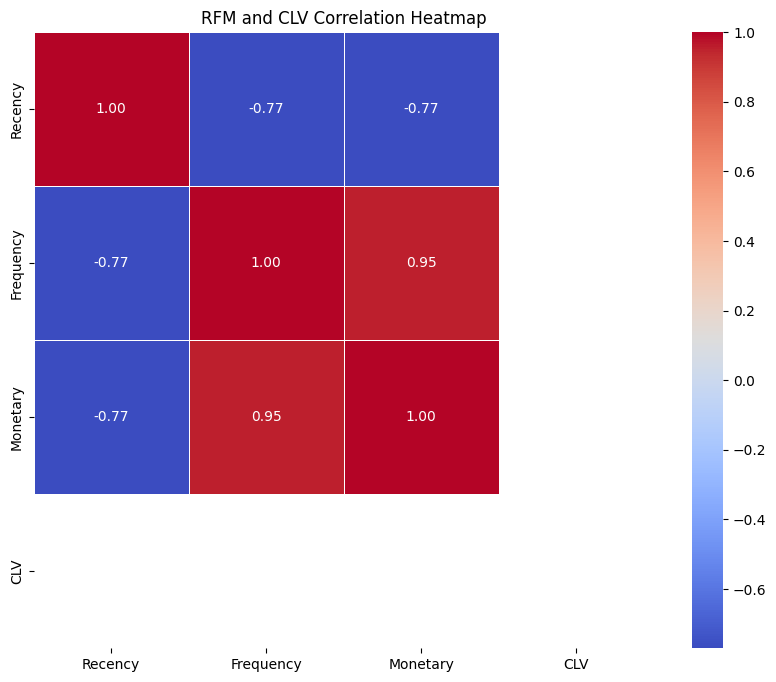

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('RFM and CLV Correlation Heatmap')
plt.show()

In [33]:
X = df[['Recency', 'Frequency', 'Monetary']]



In [34]:
kmeans = KMeans(n_clusters=3) 
df['Segment'] = kmeans.fit_predict(X)

C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [35]:
segment_statistics = df.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CLV': 'mean'
})
print(segment_statistics)

         Recency  Frequency  Monetary     CLV
Segment                                      
0            4.0        6.0     250.0  9396.0
1            1.0       12.0     800.0  9396.0
2            9.0        2.5     100.0  9396.0


In [36]:
segmented_data = df.groupby('Segment')


In [37]:
segment_clv = {}
for segment, data in segmented_data:
    average_purchase_value = data['Monetary'].mean()
    average_purchase_frequency = data['Frequency'].mean()
    average_customer_lifespan = data['Recency'].mean()
    segment_clv[segment] = (average_purchase_value * average_purchase_frequency * average_customer_lifespan)


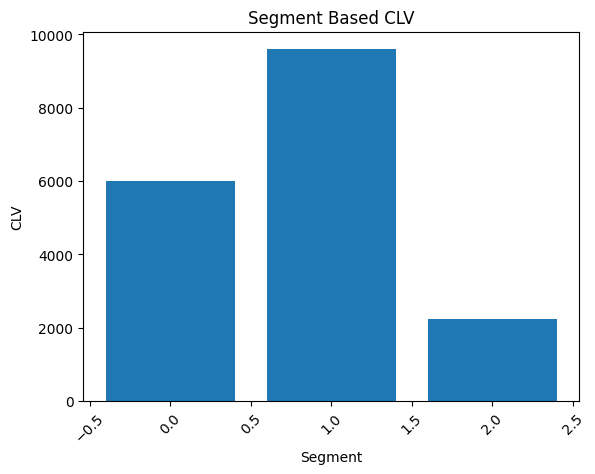

In [38]:
plt.bar(segment_clv.keys(), segment_clv.values())
plt.xlabel('Segment')
plt.ylabel('CLV')
plt.title('Segment Based CLV')
plt.xticks(rotation=45)
plt.show()

In [39]:
product_grouped_data = df.groupby('CustomerID')


In [40]:
customer_product_clv = {}
for (customer), data in product_grouped_data:
    average_purchase_value = data['Monetary'].mean()
    average_purchase_frequency = data['Frequency'].mean()
    average_customer_lifespan = data['Recency'].mean()
    customer_product_clv[(customer)] = (average_purchase_value * average_purchase_frequency * average_customer_lifespan)

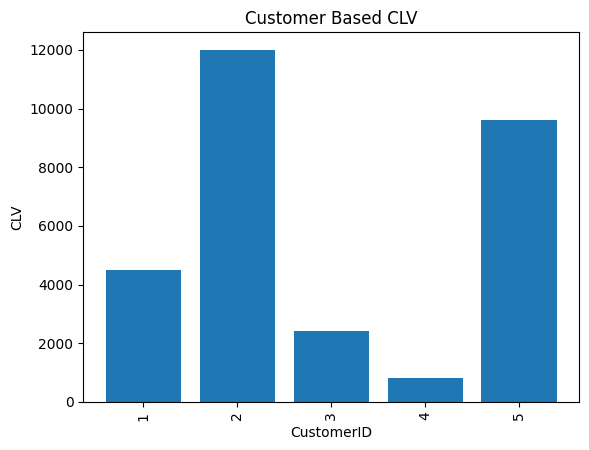

In [41]:
plt.bar(customer_product_clv.keys(), customer_product_clv.values())
plt.xlabel('CustomerID')
plt.ylabel('CLV')
plt.title('Customer Based CLV')
plt.xticks(rotation=90)
plt.show()